<a href="https://colab.research.google.com/github/milenamichalska/modelowanie-i-symulacja/blob/main/rocket_flight_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Symulator parametrów lotu rakiety modelarskiej</h1>

Program który własnie widzisz to **uproszczony symulator parametrów lotu dla rakiety** (modelarskiej, jest zbyt niedokładny by wyliczać nim duże rakiety). 

Napisany jako zadanie domowe na przedmiot Modelowanie i symulacja systemów, postanowiłam przerobić go na interaktywną formę Jupyter Notebook i dokładniej opisać jego działanie.

Korzystałam z objaśnień ze strony http://www.rocketmime.com/rockets/rckt_sim.html

Skrypt z wizualizacją w czasie rzeczywistym: https://github.com/milenamichalska/modelowanie-i-symulacja/blob/main/rocket_flight_simulation.py

[Instrukcja obsługi narzędzia Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).



## Import bibliotek
Program jest napisany w języku Python. Importuję biblioteki do operacji matematycznych i rysowania wykresów.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Parametry wejściowe


### Parametry symulacji
Czas i krok dla symulacji

In [2]:
time_interval = 0.1 #interwal dla kalkulacji w sekundach
time = 100.0 #czas symulacji

### Parametry lotu
Wartości poniższych zmiennych możesz uzupełnić wartościami właściwymi dla Twojej rakiety.

#### Parametry rakiety


- Masa rakiety bez silnika

In [3]:
empty_rocket_mass = 0.1 #kg

- Współczynnik oporu powietrza

Jego wyznaczenie jest skomplikowane i wymaga danych zebranych podczas lotów testowych, procedura została obszernie opisana w [dokumencie od Apogee Rockets](https://www.apogeerockets.com/education/downloads/Newsletter303.pdf). Przyjęłam średnią warość 0.75

In [4]:
drag_coefficent = 0.75

- Średnica rakiety i spadochronu

Aby wyliczyć optymalne wymiary spadochronu można skorzystac z [kalkulatora z forum Polskiego Towarzystwa Rakietowego](http://rakiety.org.pl/forum/viewtopic.php?f=8&t=3263).

In [5]:
rocket_diameter = 0.1 #m
parachute_diameter = 0.6 #m

#### Parametry silnika


Przykładowe dane dla silnika Klima C6-3
- Masa silnika bez paliwa

In [6]:
motor_mass = 0.004 #kg

- Masa paliwa

In [7]:
propellant_mass = 0.01 #kg

- Ciąg i impuls całkowity silnika

In [8]:
motor_impulse = 10.0 #Ns
motor_thrust = 6.0 #N

- Opóźnienie, po jakim zostanie odpalony ładunek miotający w celu wypchnięcia spadochronu

In [9]:
parachute_deployment_delay = 3 #s

## Wyliczenia i zmienne początkowe

- Czas spalania i ubytek masy w ciągu jednej sekundy

In [10]:
burn_time = float(motor_impulse / motor_thrust)
mass_decrement = propellant_mass / burn_time

- Masa rakiety i powierzchnia na która działaja opory powietrza

In [11]:
mass = empty_rocket_mass + motor_mass + propellant_mass
rocket_area = np.pi * (rocket_diameter / 2)**2

- Przyciąganie ziemskie

In [12]:
g = 9.8

# Symulacja

Główna pętla programu, w której dla każdego kroku w ustawionym czasie zostanie wyliczone przyspieszenie, prędkość i wysokość rakiety.

Obliczenia są oparte na sumie sił działających na rakietę według trzech zasad dynamiki Newtona. Rozważam **siłę ciągu** (motor_thrust) odczytaną z parametrów silnika, **siłę ciężkości** (masa razy przyspieszenie grawitacyjne) i **siłę oporu powietrza** (drag_force).

Do wyliczenia siły oporu aerodynamicznego używam wzoru z anglojęzycznej wikipedii, hasła [równanie ciągu](https://en.wikipedia.org/wiki/Drag_equation):

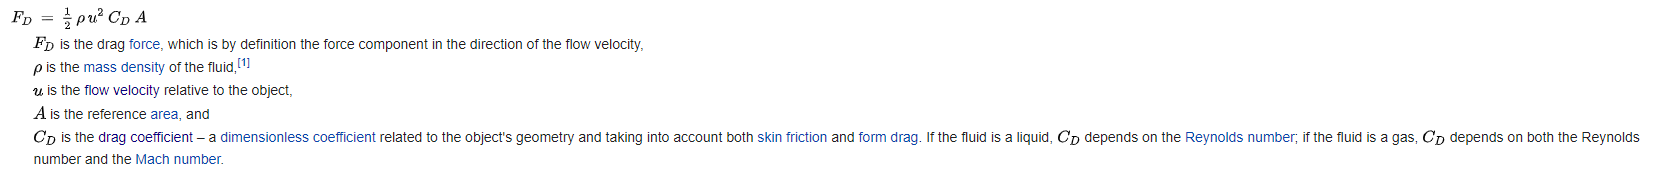


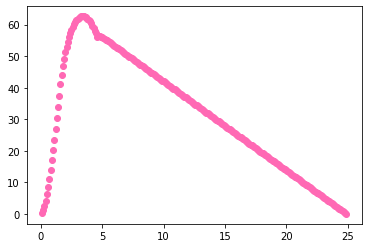

In [13]:
flight_data = [[0, 0, 0]] #wysokosc, predkosc, przyspieszenie
i = 0

for t in np.arange(0, time, time_interval):
    i += 1
    v0 = flight_data[i - 1][1]
    h0 = flight_data[i - 1][0]

    rho = 1.22 * (0.9**(h0/1000)) 
    t = i * time_interval

    if (t < burn_time):
        mass -= mass_decrement * time_interval #rakieta zmniejsza masę podczas spalania paliwa

    if (t >= burn_time + parachute_deployment_delay):
        rocket_area = np.pi * (parachute_diameter / 2)**2 #po rozłożeniu spadochronu 'powierzchnia' rakiety zwieksza sie
    
    if (v0 != 0): drag_force = 0.5 * rho * drag_coefficent * rocket_area * v0**2 * (v0 / abs(v0))  #sila oporu powietrza
    else: drag_force = 0

    rocket_force = - drag_force - mass * g
    if (t < burn_time): rocket_force += motor_thrust #w czasie dzialania silnika na rakiete dziala sila ciągu silnika

    acceleration = rocket_force / mass #druga zasada dynamiki Newtona
    velocity = v0 + acceleration * time_interval
    altitude = h0 + velocity * time_interval

    if (altitude <= 0): break #przerwanie symulacji gdy rakieta wyladuje
    flight_data.append([altitude, velocity, acceleration])

    #wizualizacja/wykres
    plt.scatter(t, altitude, marker='o', color = 'hotpink')
    # plt.pause(0.05)

Wyświetlenie wyników

In [14]:
#print(flight_data)
print(t)

25.0
